In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_images = train_images/255
test_images = test_images/255

In [4]:
class_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

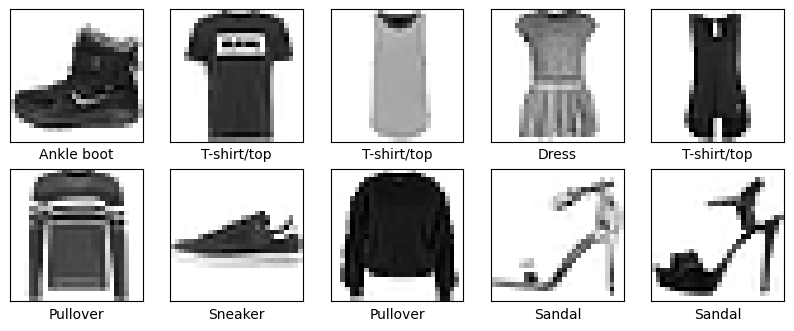

In [5]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_list[train_labels[i]])
plt.show()

In [41]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPool2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               692352    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2529 - accuracy: 0.9080
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2116 - accuracy: 0.9226
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1774 - accuracy: 0.9351
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1542 - accuracy: 0.9424
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1292 - accuracy: 0.9523
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1106 - accuracy: 0.9592
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0939 - accuracy: 0.9651
Epoch 8/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0797 - accuracy: 0.9710
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0677 - accuracy: 0.9753
Epoch 10/10
1875/1875 [==============================] - 43s 23m

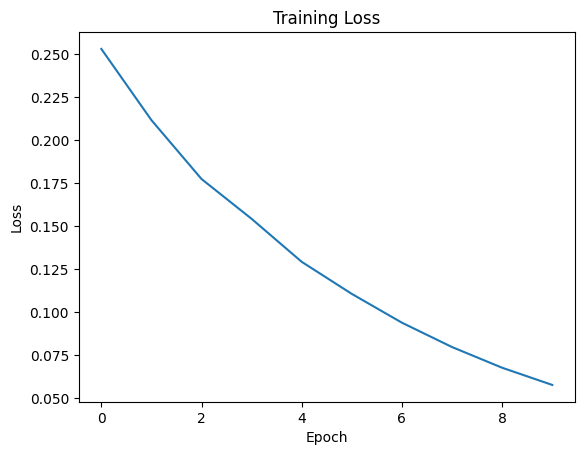

In [48]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [49]:
train_loss, train_accuracy = model.evaluate(train_images, train_labels)
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0441 - accuracy: 0.9857
Train Loss: 0.04414653778076172, Train Accuracy: 0.9857000112533569


In [51]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

313/313 [==============================] - 2s 4ms/step - loss: 0.3299 - accuracy: 0.9135
Test Loss: 0.32994458079338074, Test Accuracy: 0.9135000109672546


In [52]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [53]:
print("Predicted:", np.argmax(predictions[0]))
print("Actual:", test_labels[0])

Predicted: 9
Actual: 9
